In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns  #visualization
import matplotlib.pyplot as plt ##visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [3]:
from google.colab import files
import pandas as pd

In [4]:
uploaded = files.upload()

Saving crop_yeild_dataset.csv to crop_yeild_dataset.csv


In [5]:
filename = list(uploaded.keys())[0]

In [6]:
df = pd.read_csv(filename)

In [7]:
#basic information
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (250000, 11)

First 5 rows:
        crop       region      N     P      K  temperature  humidity  \
0       rice    Karnataka   70.7  43.6   54.9         27.2      61.2   
1       rice       Punjab  108.8  46.9   43.4         25.5      58.7   
2      maize  West Bengal   91.9  34.7   30.4         27.5      73.5   
3       rice  Maharashtra  120.0  51.6   64.3         30.4      44.2   
4  sugarcane  Maharashtra  164.8  57.0  173.0         24.0      39.5   

   rainfall    ph  area_ha  production_t  
0     255.9  6.95      268         928.2  
1      87.0  7.08      605        2213.1  
2     349.9  5.99      410        2409.2  
3       3.7  7.20      986        2303.9  
4      43.0  6.81      941       77299.3  


In [8]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
crop            0
region          0
N               0
P               0
K               0
temperature     0
humidity        0
rainfall        0
ph              0
area_ha         0
production_t    0
dtype: int64


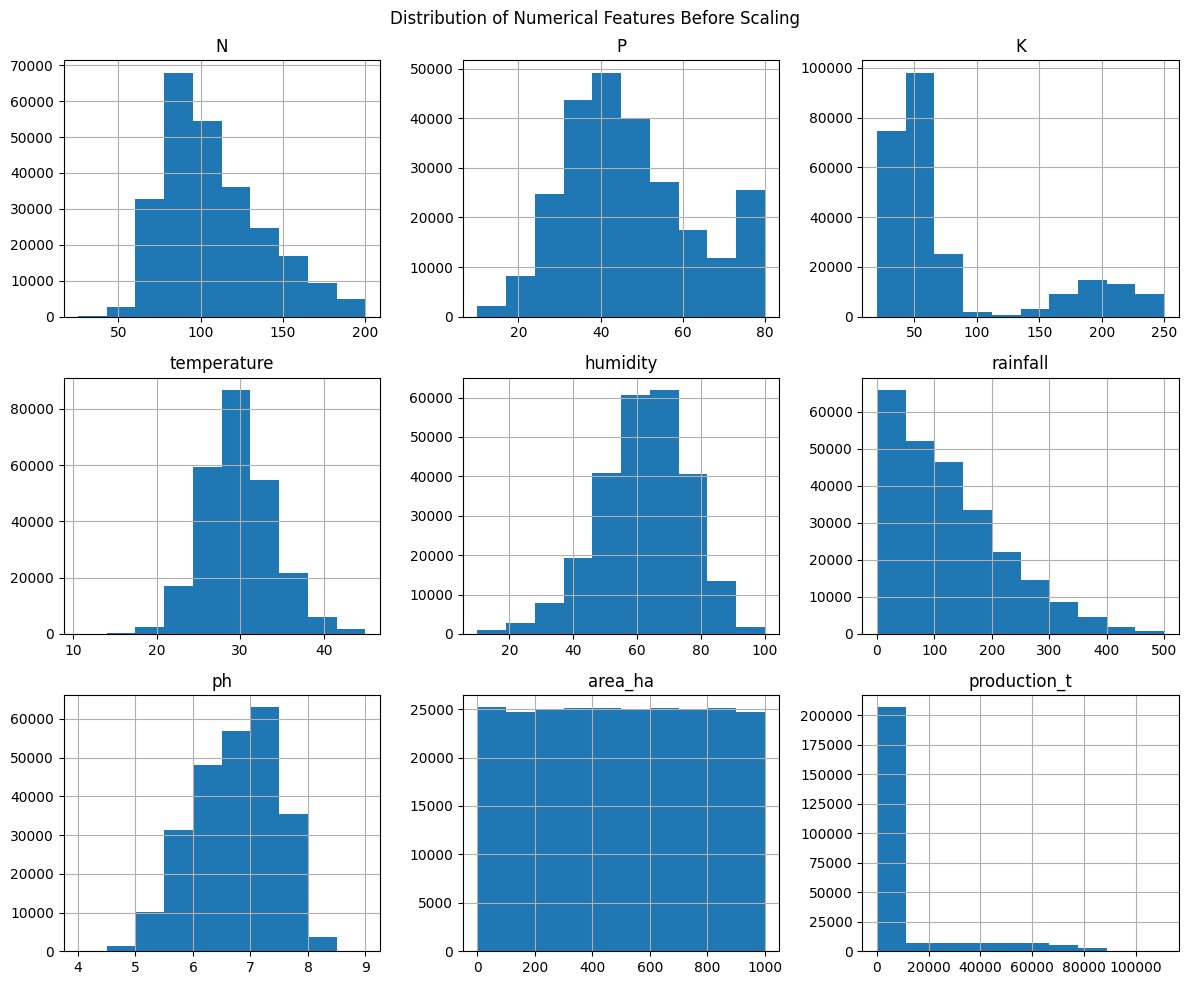

In [9]:
# Histograms for numerical features (before scaling)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features Before Scaling")
plt.tight_layout()
plt.show()

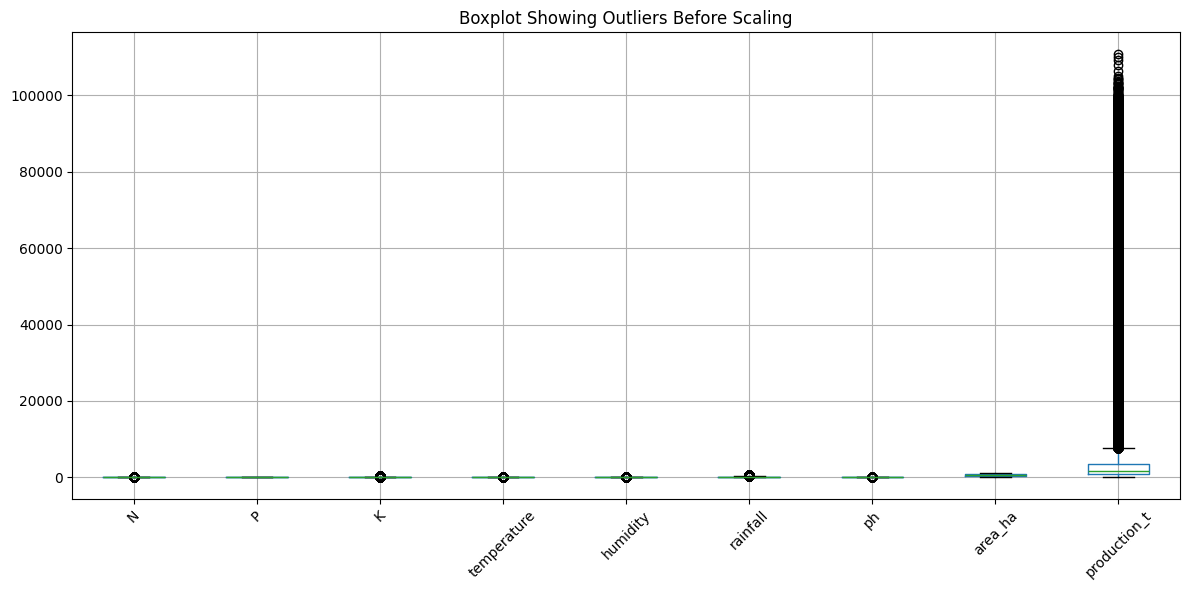

In [10]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot Showing Outliers Before Scaling")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:



df_scaled = df.copy()  # a copy of the data frame

# Manually specifing columns
scale_cols = ["N", "P", "K", "temperature", "humidity", "rainfall", "ph", "area_ha"]

# Apply scaling
scaler = MinMaxScaler()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

# Display results
print("Original DataFrame (unchanged):")
display(df.head())

print("\nScaled DataFrame:")
display(df_scaled.head())

Original DataFrame (unchanged):


,crop,region,N,P,K,temperature,humidity,rainfall,ph,area_ha,production_t
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3



Scaled DataFrame:


,crop,region,N,P,K,temperature,humidity,rainfall,ph,area_ha,production_t
0,rice,Karnataka,0.259026,0.480000,0.151739,0.482558,0.568889,0.5118,0.590,0.267267,928.2
1,rice,Punjab,0.477364,0.527143,0.101739,0.433140,0.541111,0.1740,0.616,0.604605,2213.1
2,maize,West Bengal,0.380516,0.352857,0.045217,0.491279,0.705556,0.6998,0.398,0.409409,2409.2
3,rice,Maharashtra,0.541547,0.594286,0.192609,0.575581,0.380000,0.0074,0.640,0.985986,2303.9
4,sugarcane,Maharashtra,0.798281,0.671429,0.665217,0.389535,0.327778,0.0860,0.562,0.940941,77299.3


In [12]:
#StandardScaler implementation
# Manually specifying columns
scale_cols = ["N", "P", "K", "temperature", "humidity", "rainfall", "ph", "area_ha"]

# Create scaler object
scaler = StandardScaler()

# Apply standardization
df_standard = df.copy()
df_standard[scale_cols] = scaler.fit_transform(df_standard[scale_cols])

# Display results
print("After Standard Scaling (mean=0, std=1):")
df_standard[scale_cols].head()

After Standard Scaling (mean=0, std=1):


,N,P,K,temperature,humidity,rainfall,ph,area_ha
0,-1.226840,-0.224523,-0.383646,-0.633801,-0.058820,1.341088,0.294537,-0.804666
1,0.027255,-0.017390,-0.565665,-1.048739,-0.239289,-0.373968,0.476851,0.363944
2,-0.529023,-0.783154,-0.771426,-0.560576,0.829084,2.295588,-1.051776,-0.312255
3,0.395913,0.277618,-0.234864,0.147259,-1.286005,-1.219818,0.645140,1.685132
4,1.870544,0.616563,1.485614,-1.414861,-1.625286,-0.820755,0.098200,1.529086


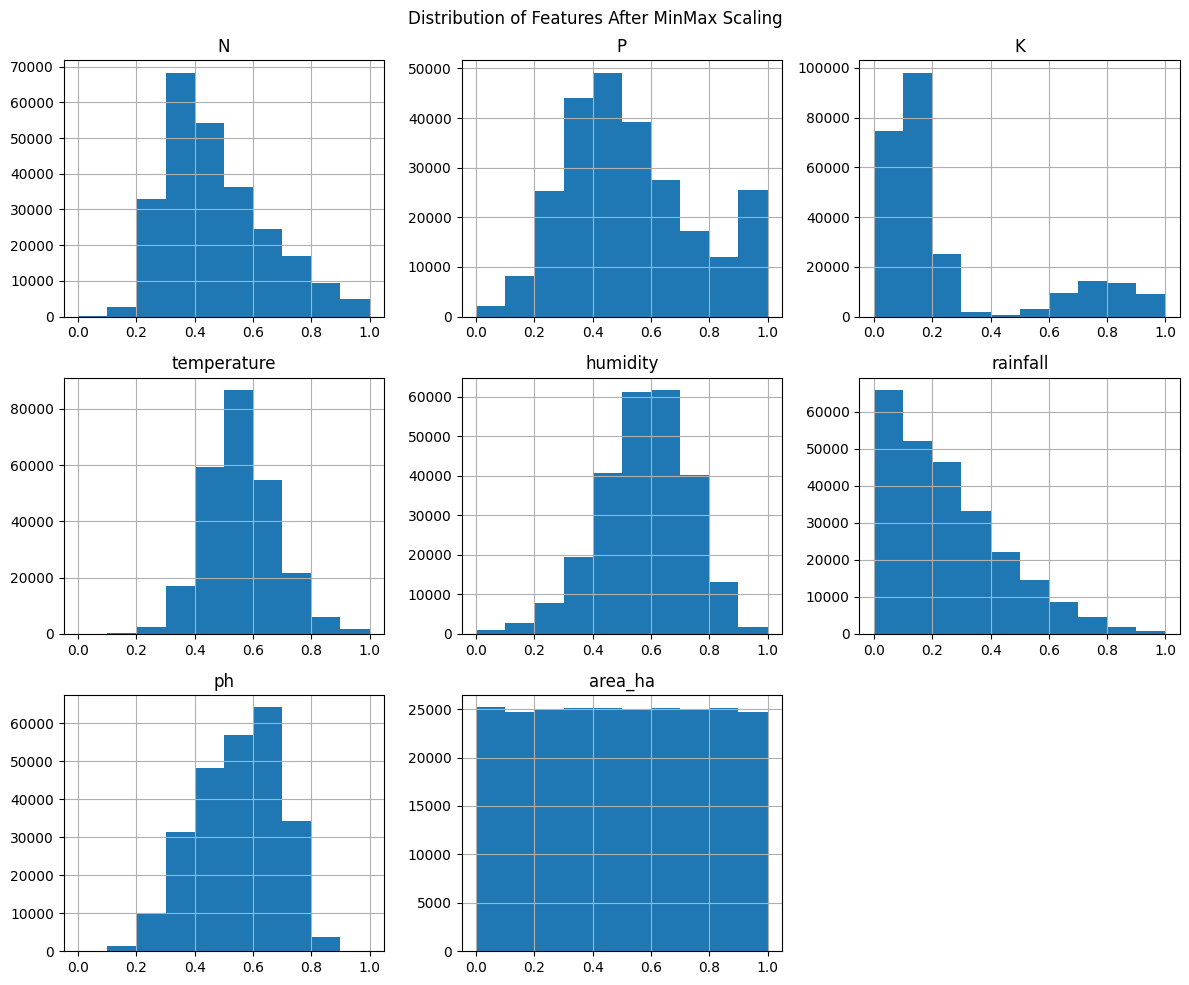

In [14]:
# Visualize after MinMax scaling
df_scaled[scale_cols].hist(figsize=(12, 10))
plt.suptitle("Distribution of Features After MinMax Scaling")
plt.tight_layout()
plt.show()


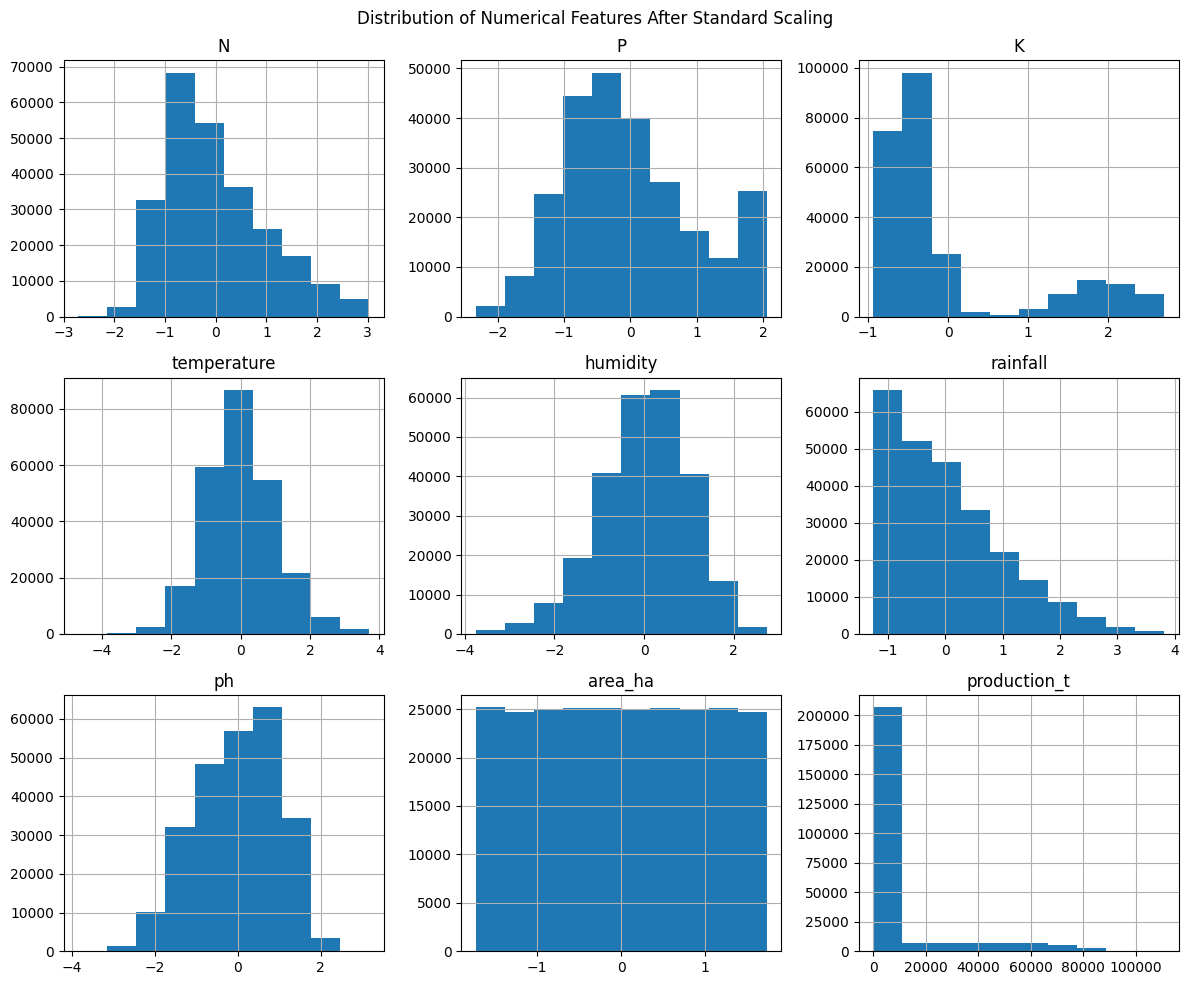

In [15]:
# Visualize after Standard scaling
df_standard[numeric_cols].hist(figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features After Standard Scaling")
plt.tight_layout()
plt.show()


In [ ]:
# Comparing correlation matrices before and after scaling

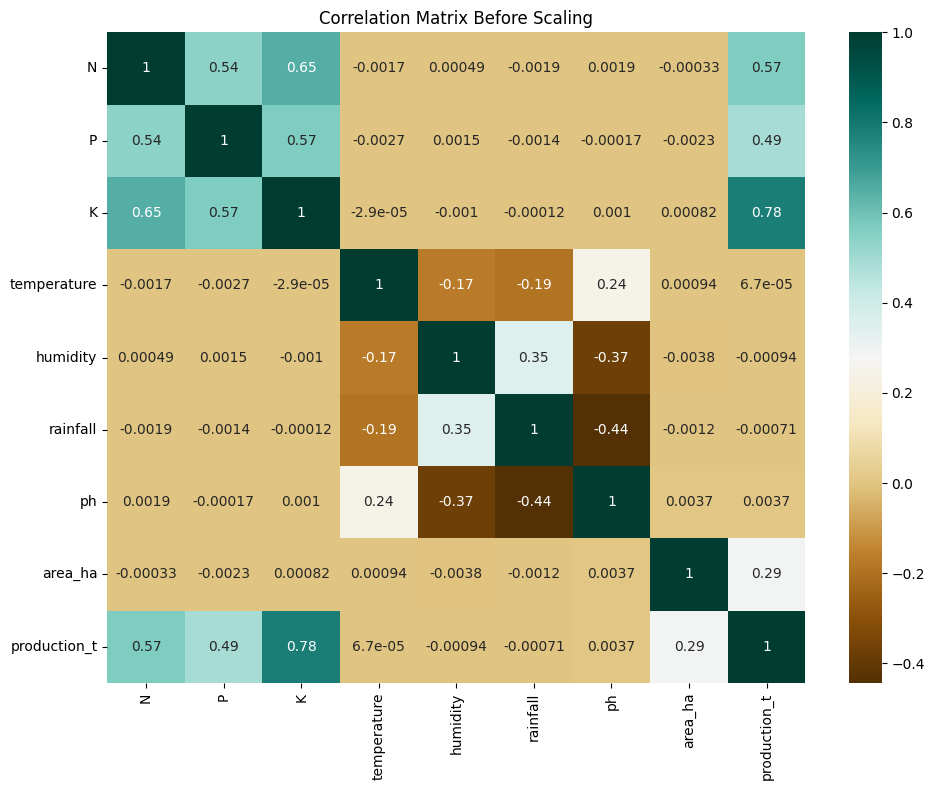

In [16]:
#bef0re min max scaling
plt.figure(figsize=(10,8))
c = df[numeric_cols].corr()  # To calculate correlation only on numeric columns
sns.heatmap(c, cmap="BrBG", annot=True)

plt.title("Correlation Matrix Before Scaling")
plt.tight_layout()
plt.show()

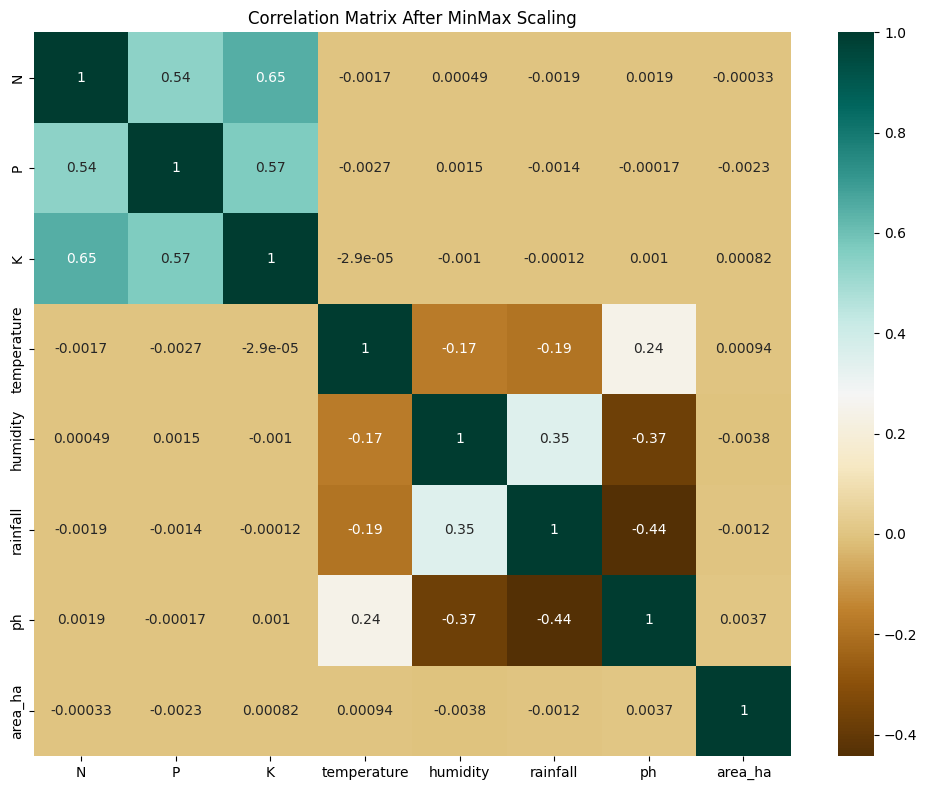

In [18]:
# After MinMax scaling
plt.figure(figsize=(10,8))
c = df_scaled[scale_cols].corr()  # correlation only on scaled feature columns
sns.heatmap(c, cmap="BrBG", annot=True)

plt.title("Correlation Matrix After MinMax Scaling")
plt.tight_layout()
plt.show()


In [ ]:
#correlation remains the same because Since correlation is based on these relationships rather than absolute values, the correlation matrix stays exactly the same before and after scaling as minmax scaling is a linear transformation which changes the range but preserves the pattern between data points